In [7]:
#Question 1, Part a. I decided to convert the input to a string, if it is a string or integer.

In [17]:
#inp is input that can either be string or integer
def isPalindrome(inp):
    if type(inp) == type('') or type(inp) == type(1): 
        #so I couldn't figure out how to compare datatypes so I compared it so a random known type
        #sets default boolean value
        isPal = False
        #converts to string, because it is easier to reverse
        txt1 = str(inp)
        #this essentially reverses the string, and then compares it to the original
        txt2 = txt1[::-1]
        if txt1 == txt2:
            isPal = True
            return isPal
        else:
            return isPal
    else:
        #again, converting to strings to makes coding easier for palindromes
        print('Input of ' + str(inp) + ' had datatype of ' + str(type(inp)) + ' , so the function was not run.')
        
        

In [18]:
#Question 1, Part B. I am running examples of strings and integers that are and are not palindromes to test the function.

In [21]:
#creating list of strings, integers, floats, and booleans to test isPalindrome function
values = ['racecar', 'noon', 'computer', 515, 712, 11, 5.5, 10.6, True, False]
#iterating through the list and running the function on each item
for item in values:
    palin = isPalindrome(item)
    if palin == True:
        #I have to convert everything to strings to make it easier to concatenate.
        print(str(item) + ' has a datatype of ' + str(type(item)) + ' and is a palindrome.')
    elif palin == False:
        print(str(item) + ' has a datatype of ' + str(type(item)) + ' and is not a palindrome.')
    


racecar has a datatype of <class 'str'> and is a palindrome.
noon has a datatype of <class 'str'> and is a palindrome.
computer has a datatype of <class 'str'> and is not a palindrome.
515 has a datatype of <class 'int'> and is a palindrome.
712 has a datatype of <class 'int'> and is not a palindrome.
11 has a datatype of <class 'int'> and is a palindrome.
Input of 5.5 had datatype of <class 'float'> , so the function was not run.
Input of 10.6 had datatype of <class 'float'> , so the function was not run.
Input of True had datatype of <class 'bool'> , so the function was not run.
Input of False had datatype of <class 'bool'> , so the function was not run.


In [11]:
#Question 1, Part C, I copied and pasted the text from the website into a text document and read the file.

In [36]:
text_file = open("q1.txt", "r")

#reading text file
lines = text_file.read()

#removing punctuation in the text by replacing the punctuation with an empty space
lines2 = lines.replace('.', ' ')
lines3 = lines2.replace(',', '  ')
lines4 = lines3.replace(':', ' ')
lines5 = lines4.replace('[', ' ')
lines6 = lines5.replace('_', ' ')
lines7 = lines6.replace('?', ' ')
lines8 = lines7.replace(']', ' ')
lines9 = lines8.replace('(', ' ')
lines10 = lines9.replace('?', ' ')
lines11 = lines10.replace(')', ' ')
lines12 = lines11.replace('/', ' ')
lines13 = lines12.replace('>', ' ')

#using the split function of the text to obtain only the words
lines_split = lines13.split()

#creating empty list to store palindromes
palindromes = []

#iterating through words to check for palindrome and adding palindromes to a list
#I defined palindromes as a string (regardless of length) that is equal backwards and forwards
for word in lines_split:
    if isPalindrome(word) == True:
        palindromes.append(word)

#converting list to set to create unique palindromes and converting back to list
pal_set = set(palindromes) 
palindromes_unique = (list(pal_set))
     
print(palindromes_unique)    
print('There are ' + str(len(palindromes_unique)) + ' unique palindromes in the text.')

['wow', 'refer', 'level', 'sees', '7', 'did', '8', 'huh', 'stats', 'a', 'mm', 'i', '11', 'D', 'mhm', 'C', 'B', 'A', 'yay', 'I', 'xx', 'U']
There are 22 unique palindromes in the text.


In [ ]:
#Question 2, Part A - I took the model from class and edited it to take in a plot of data as the intial guess and changed the gradientDescent function to account for two input variables

B Value:  4
Global minimum  -6.52865611234413  found at ( 0.5 -2.25 )


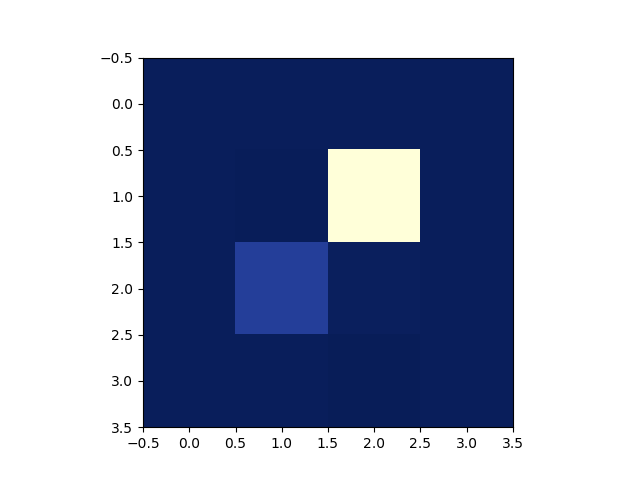

B Value:  5
Global minimum  -0.442306198516173  found at ( -0.5999999999999996 -2.8 )


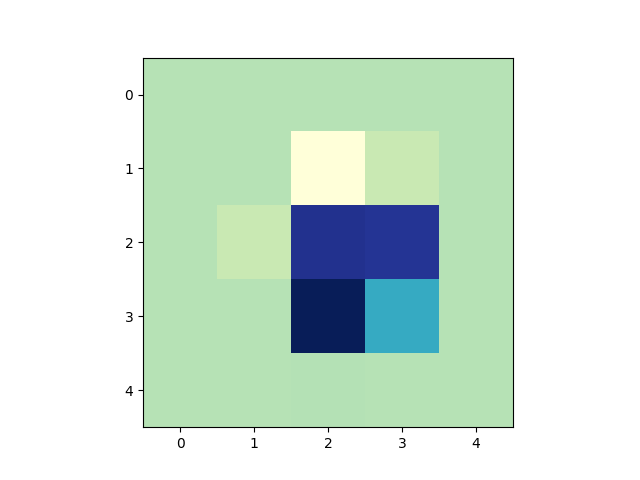

B Value:  10
Global minimum  -5.71621781549603  found at ( 0.5000000000000004 -1.6999999999999997 )


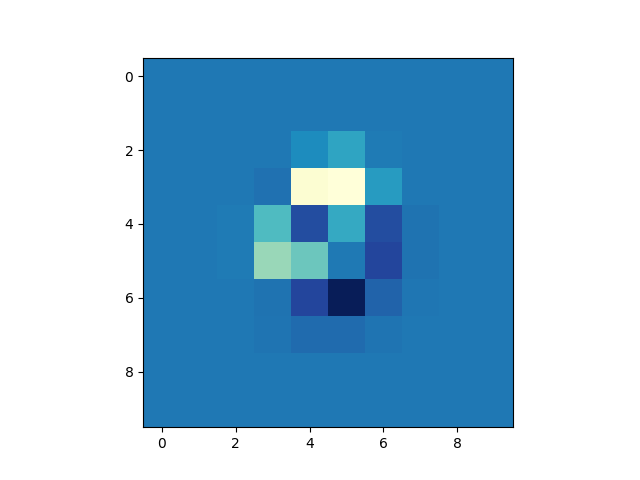

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x, y = symbols('x y')    

# Define a function.  I used sympy to calculate the partial derivatives symbolically so that the notebook
# could be used for any function, rather than calculating partial derivatives by hand - which would limit
# to a single function
def generate_function():
    expr = 3*((1-x)**2)*(exp((-x**2)-(y+1)**2)) - 10*(x/5 - x**3 - y**5)*(exp(-x**2-y**2)) - 1/3*exp(-(x+1)**2-y**2)
    return expr
    
# Determine gradient of function, return array with x and y coordinates.  Using sympy to symbolically
# differtiate, then calculating the values of x and y from the partial derivatives.
def generate_grad_function(expr, x0, y0):
    expr_diffX = Derivative(expr, x)
    dx = expr_diffX.doit()
    expr_diffY = Derivative(expr, y)
    dy = expr_diffY.doit()
    dxVal = dx.evalf(subs={x:x0, y:y0})
    dyVal = dy.evalf(subs={x:x0, y:y0})
    newPt = np.array([dxVal,dyVal], dtype=float)
    return newPt

# Calculate a gradient descent in two variables, using the sympy expression and the sympy partial
# deriviatives.  The gradient repeates until norm of the input point array is greater than the specified
# tolerance, and finishes at maximum number of iterations if tolerance is never reached.
def gradientDescent(x0, y0, expr, alpha, tolerance, maxIterations):
    grad = None
    gradPt = []
    counter = 0
    p = np.array([x0,y0], dtype=float)
    while grad is None or np.linalg.norm(p) > tolerance and counter < maxIterations:
        grad = generate_grad_function(expr, x0, y0) # p[0], p[1])
        p -= grad * alpha
        counter += 1
    return p
              
# Creating the grid and return a array of x and y values from [-c to +c] in b steps.
# Note: It will take an extra point with respect to b.
def gdVariant(c, b):
    x = []
    y = []
    x1 = -c
    y1 = -c
    increment = ((2 * c) + 1) / b #to make even steps for b points within range [-c,c]
    for i in range(b):
        x.append(x1)
        x1 += increment
    for j in range(b):
        y.append(y1)
        y1 += increment
    Variants = []
    Variants.append(x)
    Variants.append(y)
    return Variants

# Main function

# Define an expression using sympy and return the symbolic expression

expr = generate_function()

# Generate a range of b values to test, and iterate over the b values

bVals = [4, 5, 10]
c = 5
for b in bVals:
    globalMin = 1000000000 # Define globalMin to be a large number
    Results = [] # Define an array for results points
    ResultsGrid = [] # Capture results in a grid for heatmap
    GridInputs = gdVariant(c, b) # Generate the grid of inputs
    for yV in GridInputs[1]:
        ResultsRow = [] # Create an array with row value of results
        for xV in GridInputs[0]:
            # Run gradient descent for each grid point, passing the expression as an argument, which will be
            # symbolically evaluated
            gdResults = gradientDescent(xV, yV, expr, alpha = 0.01, tolerance = 0.001, maxIterations = 10)        
            # Evaluate the expressions returned for the partial derivatives with respect to x and y to
            # determine minimum
            g = expr.evalf(subs={x:gdResults[0], y:gdResults[1]})
            # If minimum is less than previous global minimum, save minimum value and coordinates
            if (g < globalMin):
                globalMin = g
                xMin = xV
                yMin = yV
            ResultsRow.append(g)
        ResultsGrid.append(ResultsRow) # Append the row results to the matrix

    # Print global minimum value and coordinates, and plot heat map of values

    print("B Value: ", b)
    print("Global minimum ", globalMin, " found at (", xMin, yMin, ")")
    rgHeatMap = np.array(ResultsGrid, dtype=float) # Convert the results matrix to a NumPy array
    plt.imshow(rgHeatMap, cmap='YlGnBu', interpolation='nearest')
    plt.show()

In [ ]:
# Part d) As the value of b increasing, the size of the matrix considerably increases, thus creating a larger 
#grid of points that are tested in the function. Both the x and y coordinates, as well as the global minimum,
# vary when the value of b changes.